# AI ASSIGNMENT - K Nearest Neighbour (KNN) ON IRIS DATASET

In [1]:
# Import packages
import pandas as pd 
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

In [2]:
iris_df=pd.read_csv("iris.csv",index_col='ID')
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
ID,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica


In [3]:
# CHECK INFO of DATASET
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
#Check IF NA VALUES ARE PRESENT
iris_df.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [5]:
#Features selection and separate into X and Y
features=["Sepal.Length","Sepal.Width","Petal.Length","Petal.Width"]
target=['Species']

X=iris_df[features]
Y=iris_df[target]

# SPLIT THE DATASET

In [6]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=5)

# TRAIN MODEL

In [7]:
knn = KNeighborsClassifier(n_neighbors = 3)# Fit the classifier to the data

knn.fit(x_train,y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

# Evaluate KNN Model

In [8]:
pred = knn.predict(x_test)

In [9]:
print("\t\t\tCLASSIFICATION REPORT \n")
print(classification_report(y_test,pred))

			CLASSIFICATION REPORT 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.82      0.90        11
   virginica       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



# Changing value of K to observe changes in Different error metrics which are Accuracy, Precision , Recall and F1-SCORE

In [10]:
# ITERATE OVER DIFFERENT K VALUES AND CALCULATE METRICS 
k_range = range(1,30+1)
k_accuracy_scores=[]
k_precision_wgt_scores=[]
k_recall_wgt_scores=[]
k_f1_wgt_scores=[]
for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(x_train,y_train.values.ravel())
    y_pred=knn_model.predict(x_test)
    k_accuracy_scores.append(accuracy_score(y_test,y_pred))
    k_precision_wgt_scores.append(precision_score(y_test,y_pred,average='weighted'))
    k_recall_wgt_scores.append(recall_score(y_test,y_pred,average='weighted'))
    k_f1_wgt_scores.append(f1_score(y_test,y_pred,average='weighted'))

scores_df=pd.DataFrame({"K-Value" : k_range,
                        "Accuracy Score" : k_accuracy_scores,
                        "Precision (Weighted)" : k_precision_wgt_scores,
                        "Recall (Weighted)" : k_recall_wgt_scores,
                        "F1-score (Weighted)" : k_f1_wgt_scores})
scores_df=scores_df.set_index("K-Value")

In [11]:
# Dataframe of scores with different K values
scores_df

,Accuracy Score,Precision (Weighted),Recall (Weighted),F1-score (Weighted)
K-Value,,,,
1,0.900000,0.902222,0.900000,0.899793
2,0.900000,0.902222,0.900000,0.899793
3,0.933333,0.943590,0.933333,0.932778
4,0.933333,0.943590,0.933333,0.932778
5,0.933333,0.943590,0.933333,0.932778
6,0.966667,0.969444,0.966667,0.966598
7,0.966667,0.969444,0.966667,0.966598
8,1.000000,1.000000,1.000000,1.000000
9,0.966667,0.969444,0.966667,0.966598


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2a97bc090>,
      dtype=object)

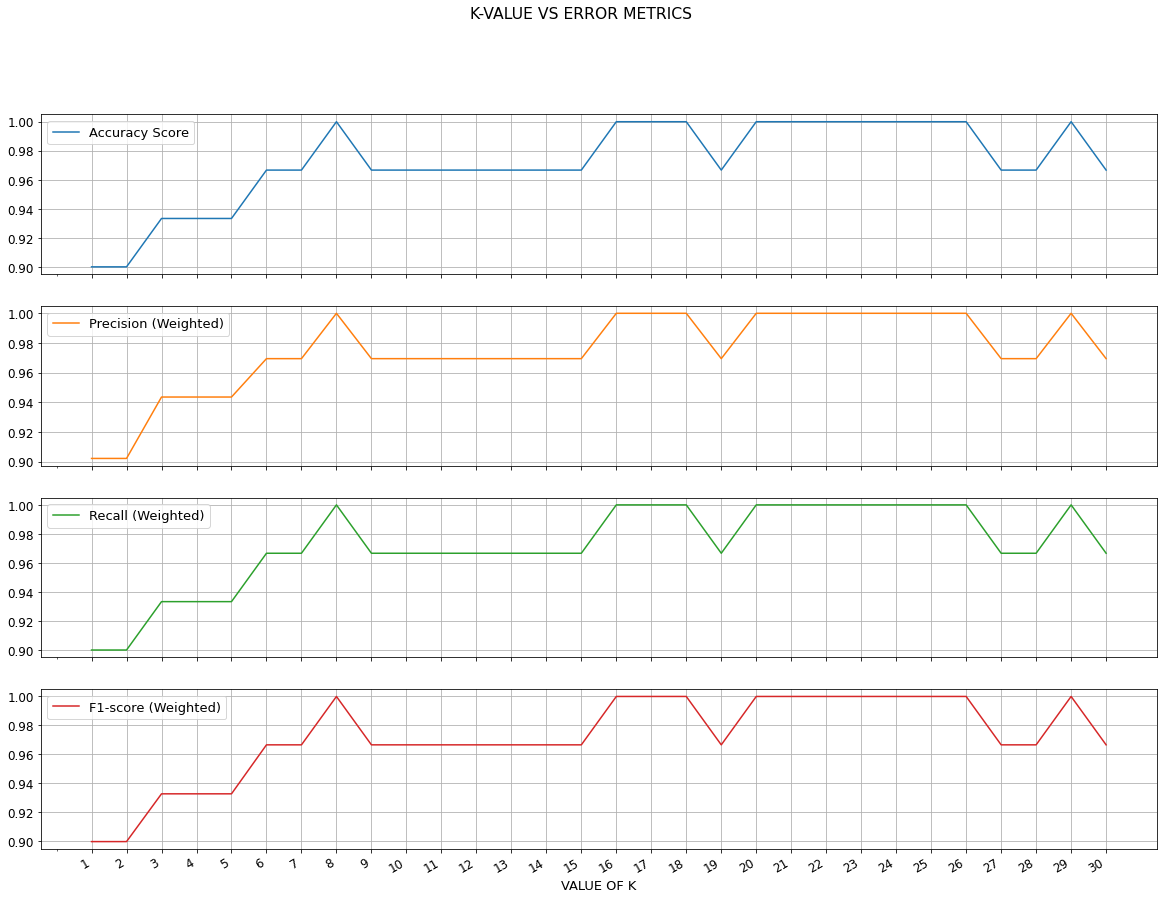

In [12]:
import matplotlib as plt
font = {'size'   : 13}
plt.rc('font', **font)

xs=pd.Series([x for x in range(1,len(scores_df)+1)])

scores_df.plot(figsize=(20,15),title="K-VALUE VS ERROR METRICS",grid=True,xticks=xs,fontsize=12,xlabel="VALUE OF K",subplots=True)

# ------------------------- END OF ASSIGNMENT -------------------------